# # Algerian Forest Fire -  Classification


# About this notebook  :   
   
     
In this notebook we would like to perform classification analysis for a given dataset. 
The EDA for this dataset can be found in :   
For classification analysis, Logistic Regression, KNN, SVC, Decision Tree, 
Random Forest and Naive bayes models were used.  
We take a look at the model evaluation metrics - Confusion matrix, accuracy, recall, precision, 
f1-score and log loss. We also take a look at the ROC curve and ROC-AUC Score for each model. Looking 
at the values we finally decide which model to use for prediction.    


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install xgboost

In [3]:
# imports from sklearn classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("C:\\Users\\Garima\\Downloads\\cleaned_data.csv")

In [6]:
df.shape

(244, 15)

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1.0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1.0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1.0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1.0


In [8]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

# Classification : 
So, for classification problem we will like to predict 'Classes' as output features. The input features are : 
'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI','Region'

In [9]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [10]:
df['Classes'].value_counts()

1    138
0    106
Name: Classes, dtype: int64

In [11]:
## Independent And dependent features
X=df.drop('Classes',axis=1)
y=df['Classes']

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1.0


In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: Classes, Length: 244, dtype: int64

In [14]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
X_train.shape,X_test.shape

((183, 11), (61, 11))

In [16]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Region'],
      dtype='object')

In [17]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Temperature,1.000000,-0.664492,-0.249312,-0.375047,0.703238,0.485379,0.374673,0.607478,0.459776,0.569554,0.256099
RH,-0.664492,1.000000,0.235766,0.262550,-0.637201,-0.398168,-0.215075,-0.691612,-0.345860,-0.578820,-0.397053
Ws,-0.249312,0.235766,1.000000,0.262759,-0.169489,-0.013533,0.073923,0.011260,0.023266,0.029551,-0.229797
Rain,-0.375047,0.262550,0.262759,1.000000,-0.585018,-0.291338,-0.296114,-0.354277,-0.301666,-0.329394,-0.096985
FFMC,0.703238,-0.637201,-0.169489,-0.585018,1.000000,0.602278,0.508348,0.745644,0.593647,0.701057,0.237434
DMC,0.485379,-0.398168,-0.013533,-0.291338,0.602278,1.000000,0.877045,0.657983,0.982049,0.868277,0.197489
DC,0.374673,-0.215075,0.073923,-0.296114,0.508348,0.877045,1.000000,0.503266,0.940947,0.746447,-0.079217
ISI,0.607478,-0.691612,0.011260,-0.354277,0.745644,0.657983,0.503266,1.000000,0.631317,0.912954,0.264224
BUI,0.459776,-0.345860,0.023266,-0.301666,0.593647,0.982049,0.940947,0.631317,1.000000,0.858832,0.093371
FWI,0.569554,-0.578820,0.029551,-0.329394,0.701057,0.868277,0.746447,0.912954,0.858832,1.000000,0.196256


## Feature Selection

<Axes: >

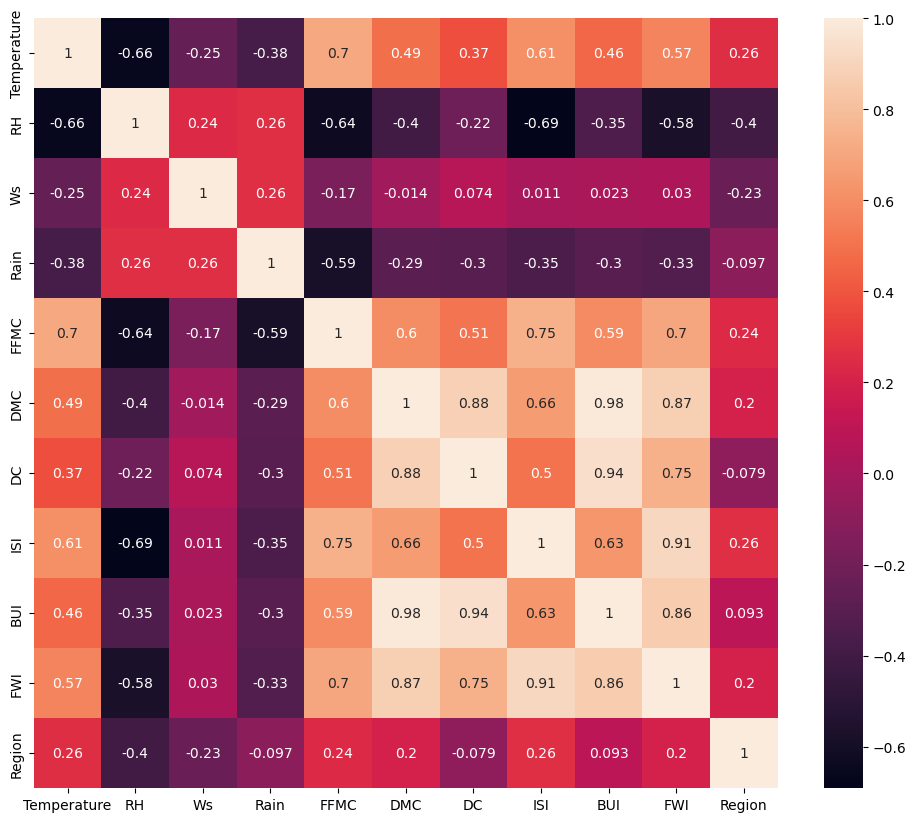

In [18]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [19]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Temperature,1.000000,-0.664492,-0.249312,-0.375047,0.703238,0.485379,0.374673,0.607478,0.459776,0.569554,0.256099
RH,-0.664492,1.000000,0.235766,0.262550,-0.637201,-0.398168,-0.215075,-0.691612,-0.345860,-0.578820,-0.397053
Ws,-0.249312,0.235766,1.000000,0.262759,-0.169489,-0.013533,0.073923,0.011260,0.023266,0.029551,-0.229797
Rain,-0.375047,0.262550,0.262759,1.000000,-0.585018,-0.291338,-0.296114,-0.354277,-0.301666,-0.329394,-0.096985
FFMC,0.703238,-0.637201,-0.169489,-0.585018,1.000000,0.602278,0.508348,0.745644,0.593647,0.701057,0.237434
DMC,0.485379,-0.398168,-0.013533,-0.291338,0.602278,1.000000,0.877045,0.657983,0.982049,0.868277,0.197489
DC,0.374673,-0.215075,0.073923,-0.296114,0.508348,0.877045,1.000000,0.503266,0.940947,0.746447,-0.079217
ISI,0.607478,-0.691612,0.011260,-0.354277,0.745644,0.657983,0.503266,1.000000,0.631317,0.912954,0.264224
BUI,0.459776,-0.345860,0.023266,-0.301666,0.593647,0.982049,0.940947,0.631317,1.000000,0.858832,0.093371
FWI,0.569554,-0.578820,0.029551,-0.329394,0.701057,0.868277,0.746447,0.912954,0.858832,1.000000,0.196256


In [20]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [21]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [22]:
corr_features

{'BUI', 'DC', 'FWI'}

In [23]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((183, 8), (61, 8))

## Feature Scaling Or Standardization

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [25]:
X_train_scaled

array([[-0.81085018,  0.16311382,  1.29231566, ..., -0.73698402,
        -0.77409606, -1.00547949],
       [ 1.06405791, -0.44884168,  0.15167049, ...,  0.7287992 ,
         0.84971776,  0.99455037],
       [-0.27516216,  0.63907922, -0.60875963, ..., -0.51271118,
        -0.21666743,  0.99455037],
       ...,
       [-1.88222624,  0.91105944,  0.53188555, ..., -1.07339329,
        -1.08916441, -1.00547949],
       [ 0.26052587, -0.38084663,  0.15167049, ...,  0.08000991,
         0.48617735,  0.99455037],
       [-0.54300617,  0.9790545 ,  2.05274578, ..., -1.02533482,
        -0.87104017, -1.00547949]])

## Logistic Regression Model

In [26]:
# Import Logistic Regression to Train from SKlearn
Logistic_Regression  = LogisticRegression()
Logistic_Regression.fit(X_train_scaled,y_train)

LogisticRegression()

In [27]:
print('Intercept is :',Logistic_Regression.intercept_)
print('Coefficient is :',Logistic_Regression.coef_)

Intercept is : [0.57478848]
Coefficient is : [[ 0.06170384  0.19848777 -0.14464208 -0.47444425  2.74730573  0.37481674
   2.9208631   0.04829342]]


In [28]:
print("Training Score:",Logistic_Regression.score(X_train_scaled, y_train))
print("Test Score:",Logistic_Regression.score(X_test_scaled,y_test))

Training Score: 0.9726775956284153
Test Score: 0.9508196721311475


In [29]:
## prediction for the test data
Logistic_Regression_Prediction = Logistic_Regression.predict(X_test_scaled)
Logistic_Regression_Prediction

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [30]:
Score = accuracy_score(y_test,Logistic_Regression_Prediction)
Classification_Report = classification_report(y_test,Logistic_Regression_Prediction)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Logistic Regression
Accuracy Score value: 0.9508
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        24
           1       1.00      0.92      0.96        37

    accuracy                           0.95        61
   macro avg       0.94      0.96      0.95        61
weighted avg       0.96      0.95      0.95        61



| Metrics     | Definition  |
| ----------- | ----------- |
| Precision      | Precision is defined as the ratio of true positives to the sum of true and false positives.       |
| Recall   | Recall is defined as the ratio of true positives to the sum of true positives and false negatives.        |
| F1 Score  | The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.   |

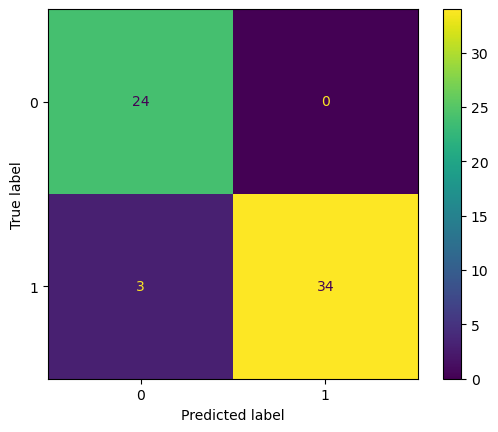

In [31]:
Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Logistic_Regression, X_test_scaled, y_test)
Logistic_Regression_Confusion_Matrix

# K_Neighbors Classifier

In [32]:
# KNeighborsClassifier to Train from SKlearn
K_Neighbors_Classifier = KNeighborsClassifier()
K_Neighbors_Classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [33]:
print("Training Score:",K_Neighbors_Classifier.score(X_train_scaled, y_train))
print("Test Score:",K_Neighbors_Classifier.score(X_test_scaled,y_test))

Training Score: 0.9508196721311475
Test Score: 0.9344262295081968


In [34]:
K_Neighbors_Classifier_prediction = K_Neighbors_Classifier.predict(X_test_scaled)
K_Neighbors_Classifier_prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [35]:
Score = accuracy_score(y_test,K_Neighbors_Classifier_prediction)
Classification_Report = classification_report(y_test,K_Neighbors_Classifier_prediction)

print("KNeighbors Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

KNeighbors Classifier
Accuracy Score value: 0.9344
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.95      0.95      0.95        37

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



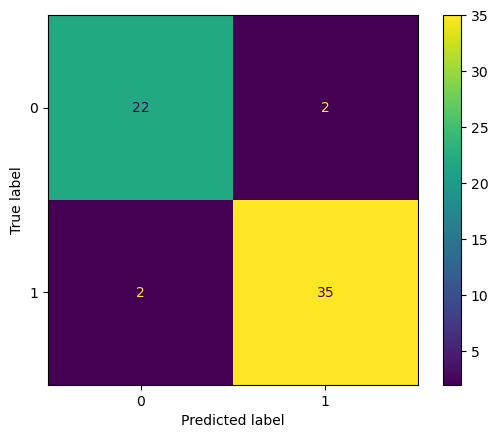

In [36]:
K_Neighbors_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(K_Neighbors_Classifier, X_test_scaled, y_test)
K_Neighbors_Classifier_Confusion_Matrix

# SVC

In [37]:
# Create an SVM classifier
svm_classifier = SVC(probability = True)
svm_classifier.fit(X_train_scaled, y_train)


SVC(probability=True)

In [38]:
print("Training Score:",svm_classifier.score(X_train_scaled, y_train))
print("Test Score:",svm_classifier.score(X_test_scaled,y_test))

Training Score: 0.9672131147540983
Test Score: 0.9672131147540983


In [39]:
svm_classifier_prediction = svm_classifier.predict(X_test_scaled)
svm_classifier_prediction

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [40]:
Score = accuracy_score(y_test,svm_classifier_prediction)
Classification_Report = classification_report(y_test,svm_classifier_prediction)

print("SVC Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

SVC Classifier
Accuracy Score value: 0.9672
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.95      0.97        37

    accuracy                           0.97        61
   macro avg       0.96      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



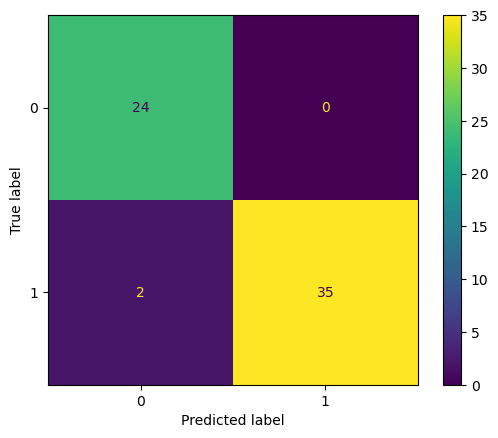

In [41]:
SVC_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test_scaled, y_test)
SVC_Classifier_Confusion_Matrix

# Decision Tree Classifier

In [42]:
Decision_Tree_Classifier = DecisionTreeClassifier()
Decision_Tree_Classifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [43]:
Decision_Tree_Classifier_prediction = Decision_Tree_Classifier.predict(X_test_scaled)
Decision_Tree_Classifier_prediction

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [44]:
Score = accuracy_score(y_test,Decision_Tree_Classifier_prediction)
Classification_Report = classification_report(y_test,Decision_Tree_Classifier_prediction)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Decision Tree
Accuracy Score value: 0.9672
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.95      1.00      0.97        37

    accuracy                           0.97        61
   macro avg       0.97      0.96      0.97        61
weighted avg       0.97      0.97      0.97        61



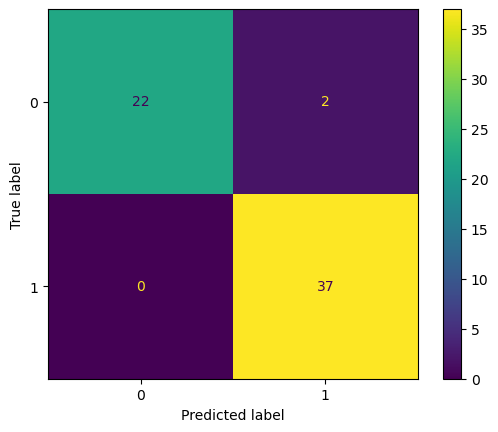

In [45]:
Decision_Tree_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Decision_Tree_Classifier, X_test_scaled, y_test)
Decision_Tree_Classifier_Confusion_Matrix

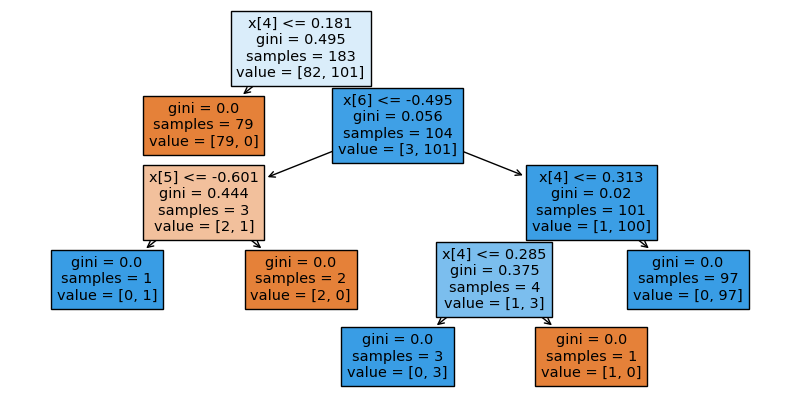

In [46]:
from sklearn import tree
plt.figure(figsize = (10,5))
tree.plot_tree(Decision_Tree_Classifier,filled = True)
plt.show()

# RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest_Classifier = RandomForestClassifier()
Random_Forest_Classifier.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [48]:
print("Training Score:",Random_Forest_Classifier.score(X_train_scaled, y_train))
print("Test Score:",Random_Forest_Classifier.score(X_test_scaled,y_test))

Training Score: 1.0
Test Score: 0.9672131147540983


In [49]:
Random_Forest_Classifier_prediction = Random_Forest_Classifier.predict(X_test_scaled)
Random_Forest_Classifier_prediction

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [50]:
Score = accuracy_score(y_test,Random_Forest_Classifier_prediction)
Classification_Report = classification_report(y_test,Random_Forest_Classifier_prediction)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Random Forest
Accuracy Score value: 0.9672
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.95      0.97        37

    accuracy                           0.97        61
   macro avg       0.96      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



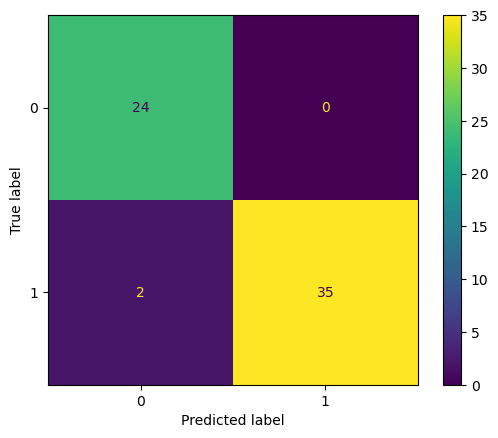

In [51]:
Random_Forest_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Random_Forest_Classifier, X_test_scaled, y_test)
Random_Forest_Classifier_Confusion_Matrix

# XGboost Model

In [52]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
print("Training Score:",xgb.score(X_train_scaled, y_train))
print("Test Score:",xgb.score(X_test_scaled,y_test))

Training Score: 0.994535519125683
Test Score: 0.9836065573770492


In [54]:
xgb_predic = xgb.predict(X_test_scaled)
xgb_predic

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [55]:
Score = accuracy_score(y_test, xgb_predic)
Classification_Report = classification_report(y_test, xgb_predic)

print("XGboost Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

XGboost Classifier
Accuracy Score value: 0.9836
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.97      1.00      0.99        37

    accuracy                           0.98        61
   macro avg       0.99      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61



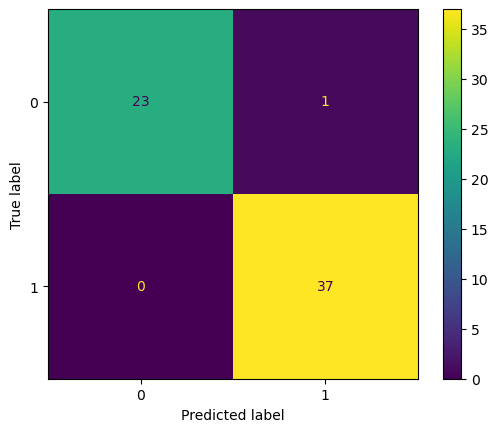

In [56]:
xgb_cm = ConfusionMatrixDisplay.from_estimator(xgb, X_test_scaled, y_test)

**Accuracy score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| XGboost classifier     | 98.36 % |
| Random Forest Classifier  | 96.72 % |
| Decision Tree Classifier  | 96.72 % |
 |SVC                        | 96.72 % |
| KNeighbors Classifier  | 93.44 %|
| Logistic Regression Accurracy  | 95.08 % |



# HyperParameter Tuning

**XGboost classifier Tuning using RandomizedSearchCV**

In [57]:
params={
 "learning_rate"    : (np.linspace(0,10, 100)) ,
 "max_depth"        : (np.linspace(1,50, 25,dtype=int)),
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]}
Random_xgb = RandomizedSearchCV(xgb, params, cv = 10,n_jobs = -1)
Random_xgb.fit(X_train_scaled, y_train).best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.40404040404040403,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
Best_xgb = Random_xgb.best_estimator_
Best_xgb.score(X_test_scaled,y_test)

0.9836065573770492

In [59]:
Bestxgb_prediction = Best_xgb.predict(X_test_scaled)
Bestxgb_prediction

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [60]:
Score = accuracy_score(y_test, Bestxgb_prediction)
Classification_Report = classification_report(y_test,Bestxgb_prediction)
print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

FINAL XGB
Accuracy Score value: 0.9836
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.97      0.99        37

    accuracy                           0.98        61
   macro avg       0.98      0.99      0.98        61
weighted avg       0.98      0.98      0.98        61



**Random Forest classifier Tuning**

In [61]:
params = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
Random_rf = RandomizedSearchCV(Random_Forest_Classifier, params, cv = 10,n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train).best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=13, max_features='auto',
                       min_samples_leaf=8, min_samples_split=5)

In [62]:
Best_rf = Random_rf.best_estimator_
Best_rf.score(X_test_scaled,y_test)

0.9672131147540983

In [63]:
Bestrf_pred = Best_rf.predict(X_test_scaled)
Bestrf_pred

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [64]:
Score = accuracy_score(y_test, Bestrf_pred)
Classification_Report = classification_report(y_test,Bestrf_pred)
print("FINAL Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

FINAL Random Forest
Accuracy Score value: 0.9672
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.95      0.97        37

    accuracy                           0.97        61
   macro avg       0.96      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



# **Model Selection**

**Applying Stratified Kfold Cross-Validation to know the exact Mean CV Accuracy Score for all models**

- Implementing the concept of StratifiedK fold sampling in cross-validation ensures the training and test sets have the same proportion of the feature of interest as in the original dataset. 

- Doing this with the target variable ensures good accuracy without error.

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 0)

In [67]:
cv_xgb= cross_val_score(Best_xgb,X,y,cv=skfold,scoring='accuracy').mean()
print('CV Score XGB Tuned {:.4f}'.format(cv_xgb))

CV Score XGB Tuned 0.9755


In [68]:
cv_rf=cross_val_score(Random_Forest_Classifier,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score Random Forest {:.4f}'.format(cv_rf))

CV Score Random Forest 0.9797


In [69]:
cv_dt =cross_val_score(Decision_Tree_Classifier,X,y,cv= skfold,scoring="accuracy").mean()
print('CV Score Decision Tree {:.4f}'.format(cv_dt))

CV Score Decision Tree 0.9715


In [70]:
cv_knn =cross_val_score(K_Neighbors_Classifier,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score KNN Classifier {:.4f}'.format(cv_knn))

CV Score KNN Classifier 0.9013


In [71]:
cv_lg=cross_val_score(Logistic_Regression,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score Logistic Regression {:.4f}'.format(cv_lg))

CV Score Logistic Regression 0.9632


### 7.2 **CV Score score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| XGBoost Classifier     | 97.55 % |
| Random Forest  | 97.97 % |
| K Neighbors Classifier  | 90.13 %|
| Decision Tree Classifier  | 97.15%|
| Logistic Regression  | 96.32 % |

From the above result XGBoost Classifier has given better Result so will proceed with that model for model Deployment.